In [2]:
import pandas as pd
frequency_df = pd.read_csv('frequency_of_the_instagram_posts.csv')
frequency_df.head()

,Political Party,Username,Post Date
0,PS,partido_socialista,2024-03-08 23:59:01
1,PS,partido_socialista,2024-03-08 23:36:30
2,PS,partido_socialista,2024-03-08 23:01:58
3,PS,partido_socialista,2024-03-08 22:36:24
4,PS,partido_socialista,2024-03-08 22:01:47


In [3]:
import pandas as pd
likes_df = pd.read_csv('total_likes_all_parties.csv')
likes_df.head()

,Political Party,Total Likes
0,PS,291936
1,PPD/PSD.CDS-PP.PPM,472780
2,CH,2519776
3,IL,597442
4,B.E.,486323


In [4]:
# To see the weekly frequency of posts for each party
import pandas as pd

# Convert 'Post Date' column to datetime format
frequency_df['Post Date'] = pd.to_datetime(frequency_df['Post Date'])

# Sort the dataframe by 'Post Date'
frequency_df.sort_values(by='Post Date', inplace=True)

# Calculate the time difference between consecutive posts
frequency_df['Time Difference'] = frequency_df.groupby('Political Party')['Post Date'].diff()

# Drop the first row for each party (since there's no time difference)
frequency_df.dropna(subset=['Time Difference'], inplace=True)

# Convert time differences to hours for easier analysis
frequency_df['Frequency of posts (weekly)'] = frequency_df['Time Difference'] / pd.Timedelta(hours=1)

avg_frequency_posts_df=frequency_df.groupby('Political Party')['Frequency of posts (weekly)'].mean()

avg_frequency_posts_df

Political Party
B.E.                   7.044782
CH                     4.661048
IL                     7.989728
L                      4.467317
PAN                   12.833861
PCP                    3.568974
PPD/PSD.CDS-PP.PPM     5.636428
PS                     5.837257
Name: Frequency of posts (weekly), dtype: float64

In [5]:
# Merge the dataframes on 'Political Party'
merged_df = pd.merge(likes_df, frequency_df, on='Political Party', how='inner')

# Calculate the correlation
correlation = merged_df['Total Likes'].corr(merged_df['Frequency of posts (weekly)'])

print("Correlation between Total Likes and Frequency of posts (weekly):", correlation)

Correlation between Total Likes and Frequency of posts (weekly): -0.04514192867171025


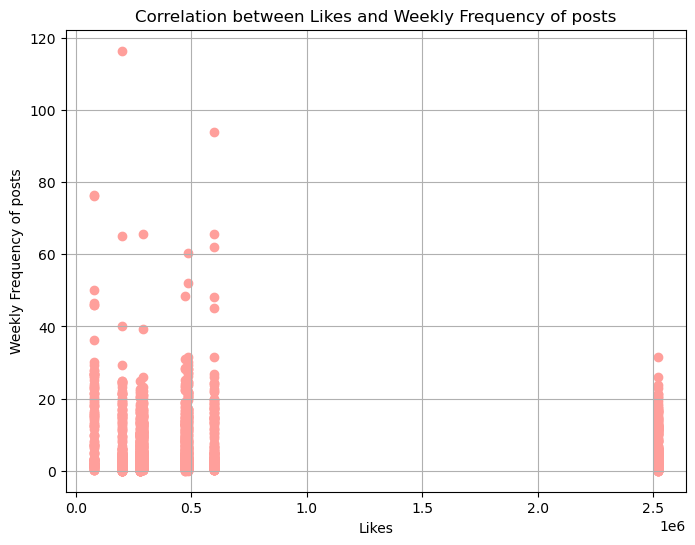

In [8]:
# Create a scatter plot

import matplotlib.pyplot as plt
import seaborn as sns

pastel_color = sns.color_palette('pastel')[3]

plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Total Likes'], merged_df['Frequency of posts (weekly)'], color=pastel_color)
plt.title('Correlation between Likes and Weekly Frequency of posts')
plt.xlabel('Likes')
plt.ylabel('Weekly Frequency of posts')
plt.grid(True)
plt.show()

In [10]:
import pandas as pd
followers_df = pd.read_csv('parties_followers_count.csv')
followers_df.head()

,Username,Followers,Political Party
0,partido_socialista,37306,PS
1,partidosocialdemocrata,47632,PPD/PSD.CDS-PP.PPM
2,partidochega,185810,CH
3,liberalpt,105824,IL
4,blocodeesquerdaoficial,65679,B.E.


In [11]:
# Drop the column 'username'
followers_df.drop(columns=['Username'], inplace=True)

followers_df

,Followers,Political Party
0,37306,PS
1,47632,PPD/PSD.CDS-PP.PPM
2,185810,CH
3,105824,IL
4,65679,B.E.
5,25854,PCP-PEV
6,39729,L
7,39656,PAN


In [12]:
# Merge dataframes
merged_df = pd.merge(frequency_df, followers_df, on='Political Party')

# Calculate the correlation
correlation = merged_df['Frequency of posts (weekly)'].corr(merged_df['Followers'])
print("Correlation between Frequency of posts (weekly) and Followers:", correlation)

Correlation between Frequency of posts (weekly) and Followers: -0.052806215948750554


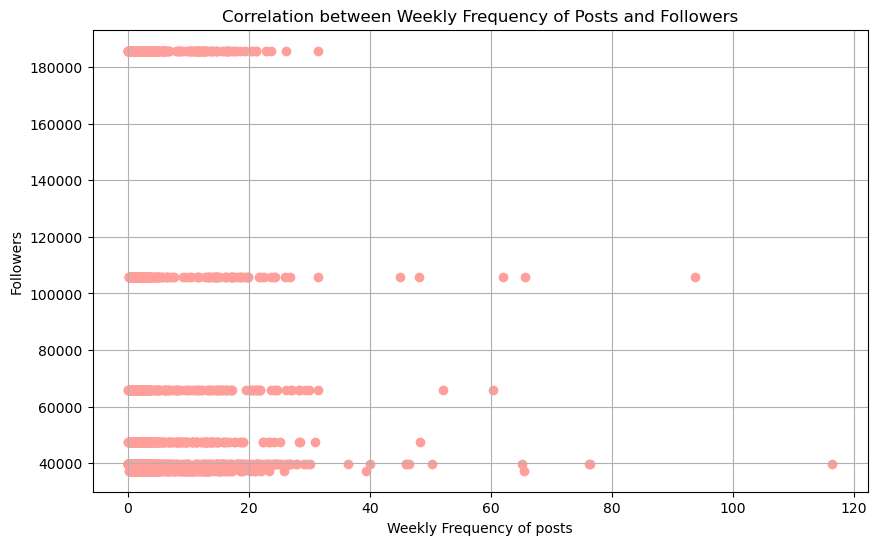

In [15]:
# Create scatter plot

import matplotlib.pyplot as plt
import seaborn as sns

pastel_color = sns.color_palette('pastel')[3]

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Frequency of posts (weekly)'], merged_df['Followers'], color=pastel_color)
plt.title('Correlation between Weekly Frequency of Posts and Followers')
plt.xlabel('Weekly Frequency of posts')
plt.ylabel('Followers')
plt.grid(True)
plt.show()